In [2]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


- 卷积核数量为32
- 卷积核尺寸为3×3
- 激活函数为ReLU
- padding设置为same
- 最大池化层的尺寸为2×2

In [3]:
# 创建一个cnn模型
def define_cnn_model():
    # 使用序列模型
    model = Sequential()
    # 卷积层
    model.add(Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(200,200,3)))
    # 最大池化层
    model.add(MaxPooling2D((2,2)))
    # Flatten层(作用就是展开图片)
    model.add(Flatten())
    # 全连接层
    model.add(Dense(128,activation="relu"))
    model.add(Dense(1,activation="sigmoid"))
    
    # 编译模型
    opt = SGD(lr=0.001,momentum=0.9)
    model.compile(optimizer=opt,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


In [8]:
# 输出模型结构
from keras.utils import plot_model
model = define_cnn_model()
plot_model(model,
           to_file='cnn_model.png',
           dpi=100,
           show_shapes=True,
           show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [38]:
def train_cnn_model():
    # 实例化模型
    model = define_cnn_model()
    # 创建图片生成器
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    train_it = datagen.flow_from_directory(
        'C:/Users/Lenovo/Desktop/dogs_cats/data/train/',
        class_mode='binary',
        batch_size=64,
        target_size=(200,200))
    # 训练模型
    model.fit_generator(train_it,
                        steps_per_epoch=len(train_it),
                        epochs=1,
                        verbose=1)
    model.save("my_model.h5")
train_cnn_model()

Found 25000 images belonging to 2 classes.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2056\573930275.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_it,


391/391 [==============================] - 389s 994ms/step - loss: 0.6645 - accuracy: 0.5901


In [39]:
from keras.models import load_model
# 修改 model_path 为自己保存的模型的位置
model_path = 'my_model.h5'
# 载入模型
model = load_model(model_path)

In [40]:
import os,random
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
%matplotlib inline

# 从测试文件夹中读取任意一张图片
def read_random_image():
    folder=r"C:/Users/Lenovo/Desktop/dogs_cats/data/test/"
    file_path = folder + random.choice(os.listdir(folder))
    pil_im = Image.open(file_path,'r')
    return pil_im

In [46]:
# 对图片进行预测
def get_predict(pil_im,model):
    name=''
    # 对图片进行缩放
    pil_im = pil_im.resize((200,200))
    # 将格式转为 numpy array格式
    array_im = np.asarray(pil_im)
    #转化为四维数组
    array_im = array_im[np.newaxis,:]
    # 对图片进行预测
    result = model.predict([[array_im]])
    if result[0][0] > 0.5:
        name = "它是狗！"
        print("预测结果是：狗")
    else:
        name = "它是猫！"
        print("预测结果是：猫")
    return name
        

1/1 [==============================] - 0s 34ms/step
预测结果是：狗


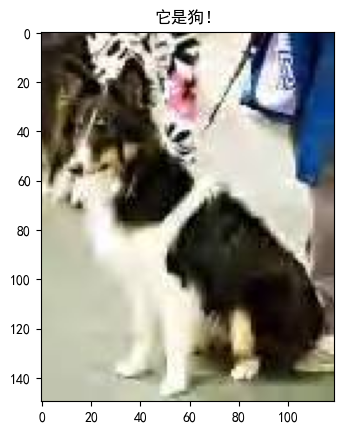

In [54]:
import pylab
import matplotlib.pyplot as plt
# 图像显示中文
plt.rcParams['font.sans-serif']=['SimHei']
# 查看模型表现
pil_im = read_random_image()
imshow(np.asarray(pil_im))
plt.title(get_predict(pil_im,model))
pylab.show()